In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
df=pd.read_csv('titanic_train.csv')


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

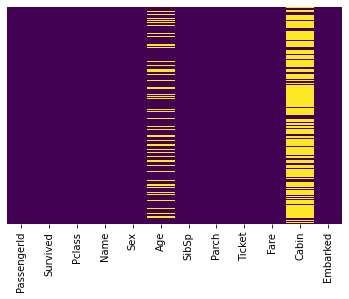

In [6]:
# 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

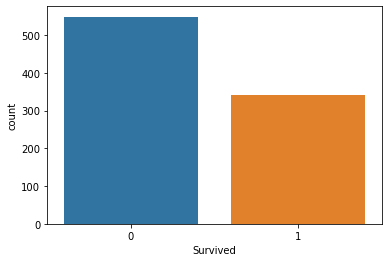

In [8]:
# survived
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

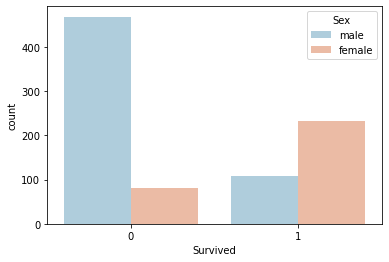

In [12]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

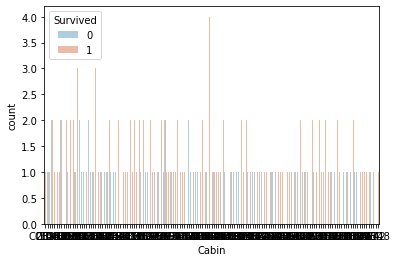

In [14]:
sns.countplot(x='Cabin',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

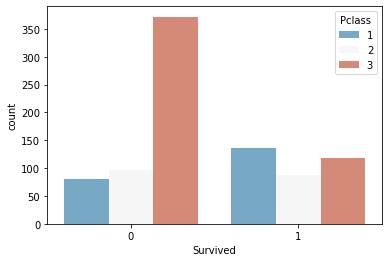

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

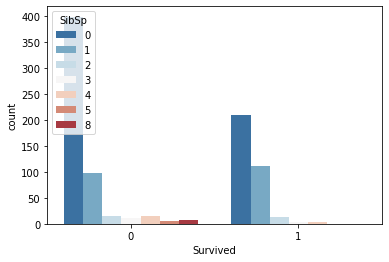

In [20]:
sns.countplot(x='Survived',hue='SibSp',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Age', ylabel='count'>

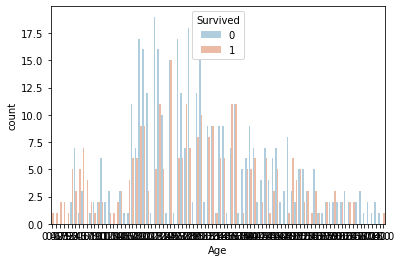

In [23]:
sns.countplot(x='Age',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Age'>

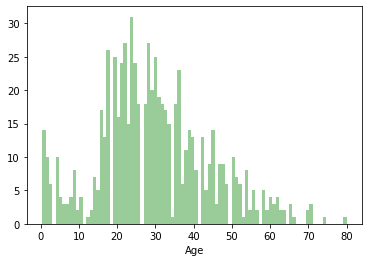

In [32]:
sns.distplot(df['Age'].dropna(),kde=False,color='green',bins=90)

In [33]:
#sns.distplot(df(df['Survived']==1.Age.dropna(),bins=10,label=Survived))

<AxesSubplot:xlabel='SibSp'>

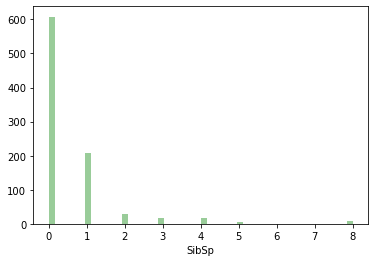

In [35]:
sns.distplot(df['SibSp'].dropna(),kde=False,color='green',bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

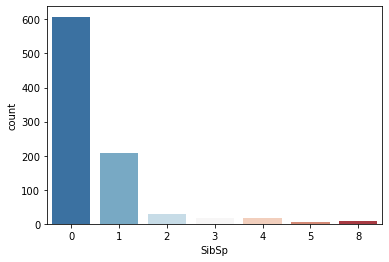

In [37]:
sns.countplot(x='SibSp',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

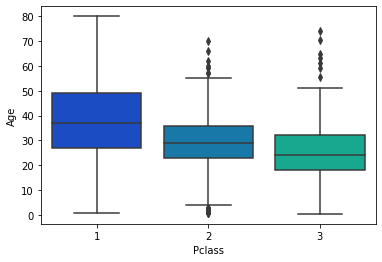

In [42]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

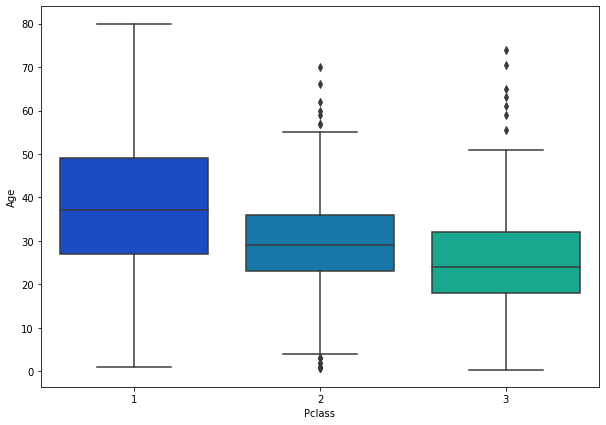

In [45]:
pyplot.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [49]:
df[df.Pclass==1].median()

C:\Users\SHACH\AppData\Local\Temp/ipykernel_20804/1257026216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.Pclass==1].median()


PassengerId    472.0000
Survived         1.0000
Pclass           1.0000
Age             37.0000
SibSp            0.0000
Parch            0.0000
Fare            60.2875
dtype: float64

In [51]:
df[df.Pclass==1].fillna(37,inplace=True)

C:\Users\SHACH\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [53]:
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)

<AxesSubplot:>

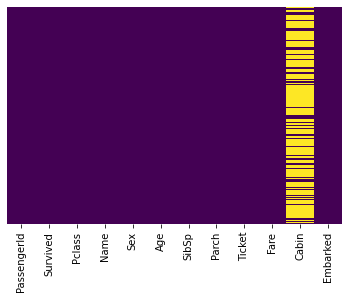

In [54]:
# 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')